<a href="https://colab.research.google.com/github/AyoubMotei/FashionMNIST_DNN/blob/master/image_processing_practice_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Chargement des données
# Les données sont automatiquement séparées en training set et test set
# (X_train, y_train) : (Images, Labels) pour l'apprentissage.
# (X_test, y_test)   : (Images, Labels) pour l'évaluation finale.
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [ ]:
# Inspection des dimensions
print(f"Forme des images d'entraînement (X_train) : {X_train.shape}")
print(f"Forme des labels d'entraînement (y_train) : {y_train.shape}")
print(f"Forme des images de test (X_test) : {X_test.shape}")
print(f"Forme des labels de test (y_test) : {y_test.shape}")
unique_labels=np.unique(y_train)
print(f"le nombre total des classe est : {len(unique_labels)}")
print(f"Labels uniques dans y_train : {unique_labels}")

Forme des images d'entraînement (X_train) : (60000, 28, 28)
Forme des labels d'entraînement (y_train) : (60000,)
Forme des images de test (X_test) : (10000, 28, 28)
Forme des labels de test (y_test) : (10000,)
le nombre total des classe est : 10
Labels uniques dans y_train : [0 1 2 3 4 5 6 7 8 9]


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

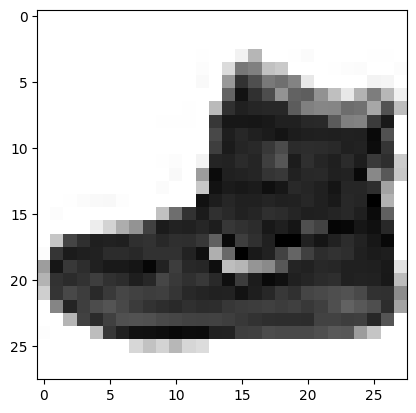

In [ ]:
print(X_train[0])

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

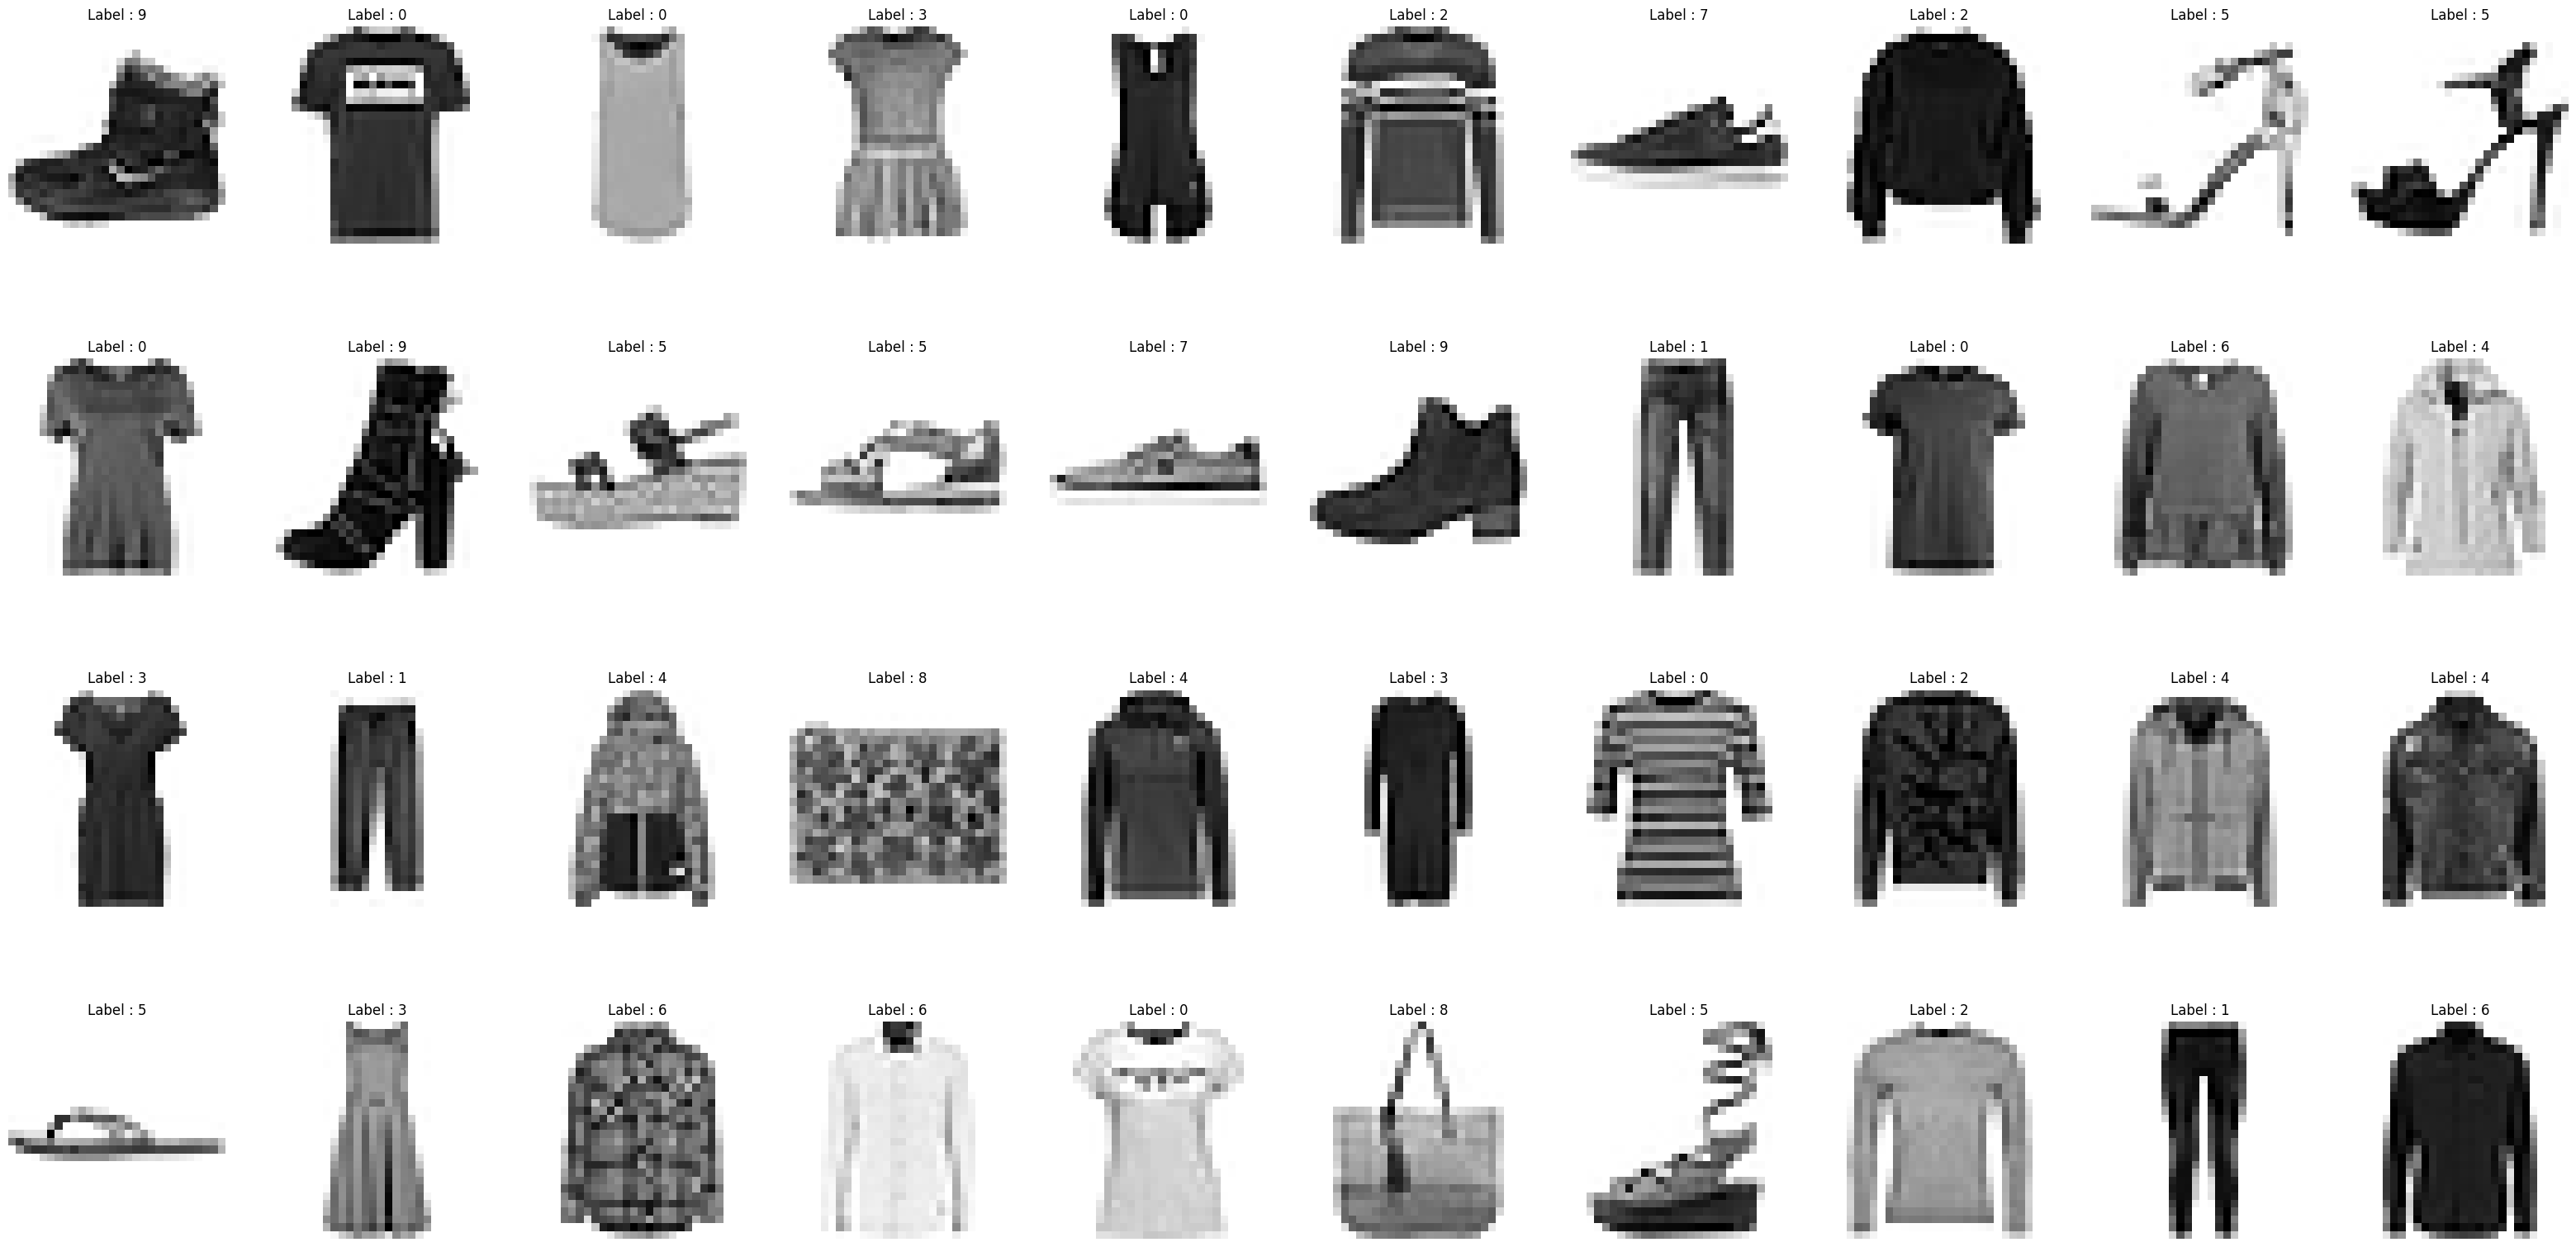

In [ ]:
plt.figure(figsize=(40,20))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Label : {y_train[i]}")
    plt.imshow(X_train[i],cmap=plt.cm.binary)

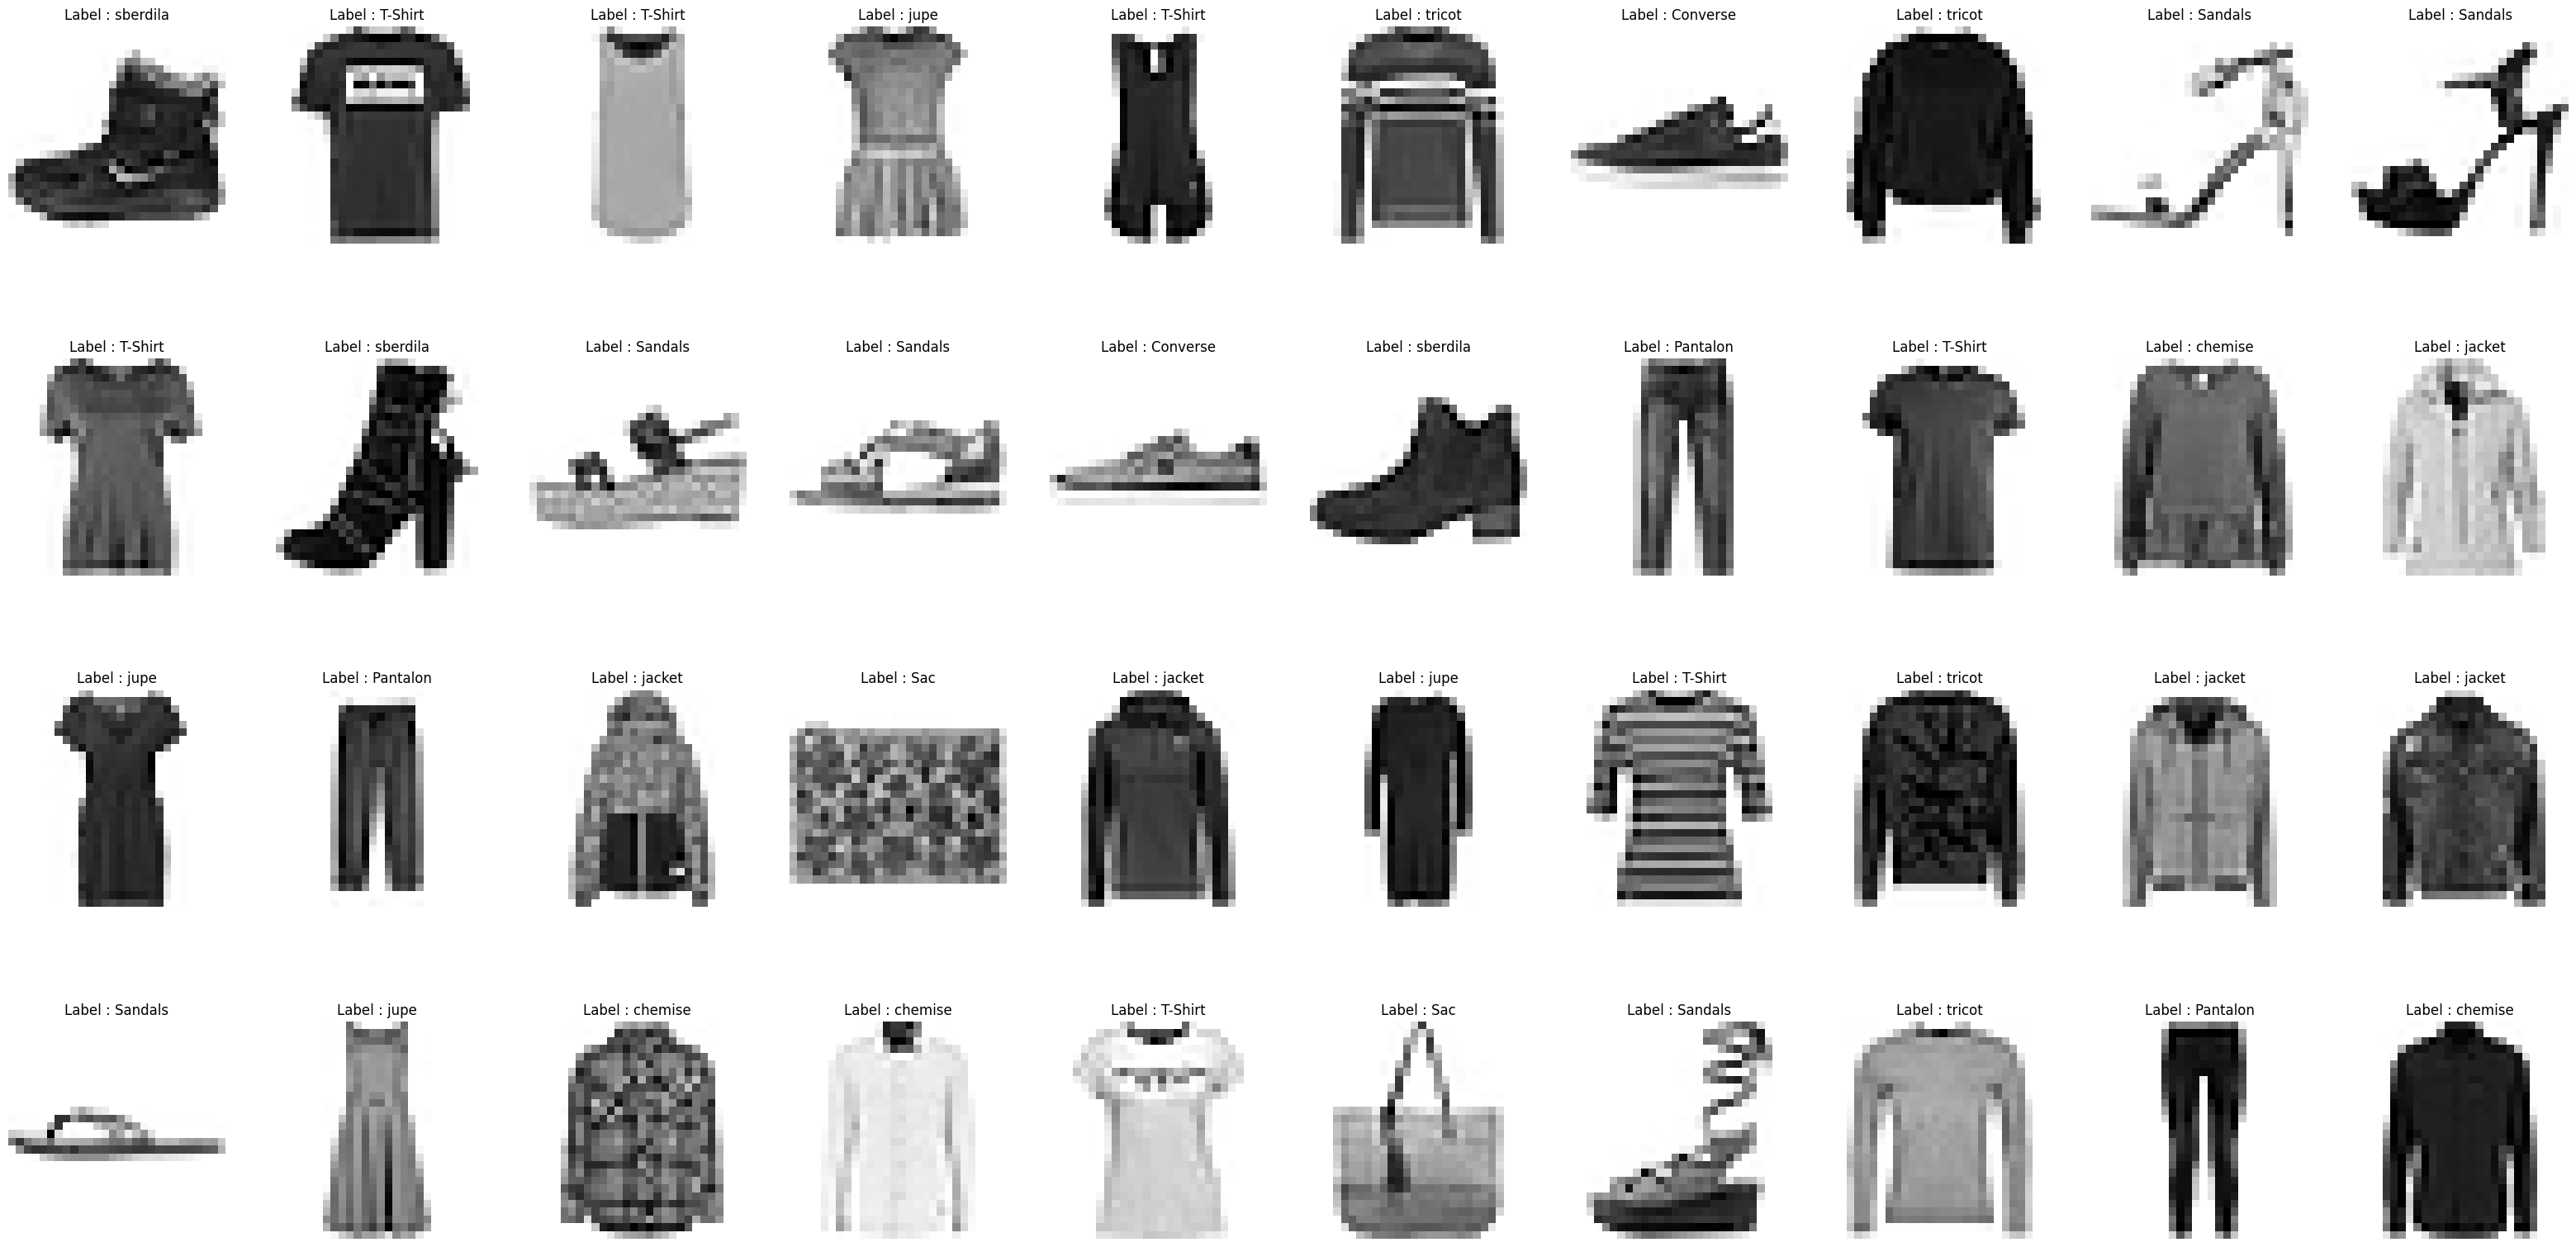

In [ ]:
class_name=['T-Shirt','Pantalon','tricot','jupe','jacket','Sandals','chemise','Converse','Sac','sberdila']
class_names_labels = []
for i in y_train :
  for y in range(len(class_name)):
    if i == y :
      class_names_labels.append(class_name[y])

plt.figure(figsize=(40,20))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Label : {class_names_labels[i]}")
    plt.imshow(X_train[i],cmap=plt.cm.binary)





In [ ]:
# Normalisation (mise à l'échelle)
X_train_norm = X_train / 255.0
X_test_norm= X_test / 255.0

# Vérification
print(f"Valeur maximale après normalisation (X_train_norm.max()) : {X_train_norm.max()}")
print(f"Valeur minimale après normalisation (X_train_norm.min()) : {X_train_norm.min()}")

Valeur maximale après normalisation (X_train_norm.max()) : 1.0
Valeur minimale après normalisation (X_train_norm.min()) : 0.0


In [ ]:
#  Création du modèle séquentiel
model = keras.Sequential([
    # Couche 1: Convertit la matrice 28x28 en vecteur 784x1
    keras.layers.Flatten(input_shape=(28, 28)),

    # Couche 2: Couche Dense cachée avec 128 neurones et activation relu
    # Le nombre de 128 est un choix d'hyperparamètre courant (puissance de 2)
    keras.layers.Dense(128, activation='relu'),

    # Couche 3: Couche de sortie avec 10 neurones (une pour chaque classe)
    # Activation softmax pour obtenir une distribution de probabilité
    keras.layers.Dense(10, activation='softmax')
])

# Affichage du résumé du modèle (vérification)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Training
history = model.fit(
    X_train_norm, y_train,
    epochs=100,
    validation_data=(X_test_norm, y_test),
    callbacks=[early_stopping] # Intégration du bonus EarlyStopping
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7844 - loss: 0.6153 - val_accuracy: 0.8474 - val_loss: 0.4352
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8634 - loss: 0.3825 - val_accuracy: 0.8572 - val_loss: 0.3970
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8765 - loss: 0.3407 - val_accuracy: 0.8722 - val_loss: 0.3632
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8885 - loss: 0.3069 - val_accuracy: 0.8702 - val_loss: 0.3539
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8936 - loss: 0.2879 - val_accuracy: 0.8765 - val_loss: 0.3518
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8960 - loss: 0.2793 - val_accuracy: 0.8728 - val_loss: 0.3506
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9013 - loss: 0.2670 - val_accuracy: 0.8795 - val_loss: 0.3338
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9047 - loss: 0

In [ ]:
# Évaluation
test_loss, test_acc = model.evaluate (X_test_norm, y_test)

print(f'Test Loss: {test_loss}')
print(f" Précision (Accuracy) Finale: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8816 - loss: 0.3655
Test Loss: 0.35527926683425903
 Précision (Accuracy) Finale: 88.11%


In [ ]:
# Afficher si le critère est validé
if test_acc > 0.80:
    print(" Objectif de Précision (Accuracy) (> 80%) atteint.")
else:
    print(" L'objectif n'est pas atteint.")

 Objectif de Précision (Accuracy) (> 80%) atteint.


##  Synthèse, Justification des Choix et Benchmark (Hugging Face)

Cette section conclut le PoC (Proof of Concept) en justifiant les choix techniques et en positionnant notre solution par rapport aux architectures State-of-the-Art (SOTA) [le meilleur niveau actuel], comme demandé par l'équipe e-commerce.

### Justification des Choix Techniques

| Hyperparamètre/Choix | Rationale |
| :--- | :--- |
| **Normalisation (/255)** | Cruciale pour avoir des données dans l'intervalle [0, 1], assurant une **convergence** plus rapide et plus stable de l'optimiseur. |
| **Activation `ReLU`** | Standard pour les couches cachées, car elle introduit de la **non-linéarité** tout en étant très rapide à calculer, favorisant la rétropropagation. |
| **Activation `Softmax`** | Indispensable pour la classification **multi-classes**, car elle fournit une **distribution de probabilité** cohérente sur les 10 classes. |
| **Loss `sparse_categorical_crossentropy`** | Choisie car les labels sont des **entiers** (0-9). C'est mathématiquement équivalent à `categorical_crossentropy` mais évite l'étape de conversion en One-Hot Encoding. |
| **Optimiseur `Adam`** | Optimiseur robuste et adaptatif, permettant généralement d'atteindre plus rapidement un bon minimum de la fonction de perte que le SGD (Descente de Gradient Stochastique) classique. |

---

###  Identification du Service IA Existant et Benchmark SOTA

Pour décider d'investir dans une solution plus complexe, nous comparons notre PoC (DNN) à la norme de l'industrie : le **Transfer Learning** via des plateformes comme **Hugging Face Hub** (utilisant des modèles comme ViT ou ResNet).

#### Service IA Identifié : Hugging Face Hub (Modèles de Classification SOTA)

| Critère | Description |
| :--- | :--- |
| **Nom du Service IA** | **Hugging Face Hub** (plateforme) / **Vision Transformers (ViT)** (architecture SOTA). |
| **Plan Tarifaire** | Les modèles sont **Open-Source/Gratuits** (pas de licence). Le coût est lié à l'**infrastructure cloud (GPU/TPU)** nécessaire pour l'entraînement et l'inférence en production. |
| **Avantages** | **Performance supérieure** ($>95\%$ typique), robustesse face aux variations d'images réelles, rapidité du **fine-tuning** grâce au Transfer Learning. |
| **Inconvénients** | **Plus lourd** en mémoire et plus coûteux en temps d'inférence (nécessite un GPU en production). |

#### Synthèse Comparative (PoC vs. SOTA)

| Caractéristique | Notre Modèle DNN Simple (PoC) | Modèle SOTA (Hugging Face / ViT) |
| :--- | :--- | :--- |
| **Objectif Principal** | Valider le pipeline. | Atteindre la meilleure précision possible. |
| **Précision Atteinte** | **88.11%** (Objectif >80% atteint) | $\sim 99\%$ |
| **Complexité** | **Très Faible** (Minimaliste, rapide à prototyper). | **Très Élevée** (Entraîné sur des millions d'images). |
| **Recommandation Business** | Le **PoC est validé**. Pour la production et des résultats de haute qualité sur des images réelles, l'investissement dans une architecture SOTA (CNN ou ViT) via le **Transfer Learning** est justifié. |